# import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 1.Problem statement

In [ ]:
To predict whether patient is having heart disease or not

# 2.Read thr dataset

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3.EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

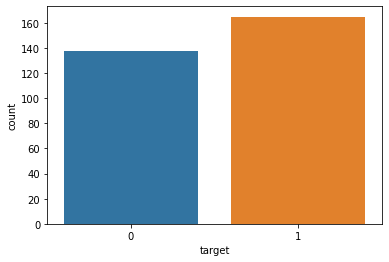

In [6]:
sns.countplot(df['target'])

# 4.Splitting the dataset

In [7]:
x = df.drop('target',axis=1)
y = df['target']

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=25,stratify=y)

# 5.Model building and training

In [9]:
log_model = LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

# 6.Model evaluation

In [13]:
# Testing data evaluation
ypredtest = log_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report: \n',Classification_report)

Accuracy: 0.8289473684210527
Confusion_matrix: 
 [[27  8]
 [ 5 36]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.82      0.88      0.85        41

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



In [14]:
# Training data evaluation
ypredtrain = log_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification_report: \n',Classification_report)

Accuracy: 0.8458149779735683
Confusion_matrix: 
 [[ 78  25]
 [ 10 114]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       103
           1       0.82      0.92      0.87       124

    accuracy                           0.85       227
   macro avg       0.85      0.84      0.84       227
weighted avg       0.85      0.85      0.84       227



In [28]:
ytest[:10]

5      1
88     1
35     1
175    0
22     1
116    1
147    1
293    0
294    0
59     1
Name: target, dtype: int64

In [27]:
ypredtest[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

# ROC curve

In [15]:
ypredprob = log_model.predict_proba(xtest)
ypredprob

array([[0.2312491 , 0.7687509 ],
       [0.03167872, 0.96832128],
       [0.23729003, 0.76270997],
       [0.97274507, 0.02725493],
       [0.19107936, 0.80892064],
       [0.22364135, 0.77635865],
       [0.00741717, 0.99258283],
       [0.3270773 , 0.6729227 ],
       [0.81185209, 0.18814791],
       [0.27547017, 0.72452983],
       [0.41969144, 0.58030856],
       [0.24075762, 0.75924238],
       [0.98440854, 0.01559146],
       [0.02380327, 0.97619673],
       [0.99057765, 0.00942235],
       [0.06180833, 0.93819167],
       [0.05531451, 0.94468549],
       [0.99278329, 0.00721671],
       [0.99093062, 0.00906938],
       [0.25782284, 0.74217716],
       [0.05705489, 0.94294511],
       [0.04344151, 0.95655849],
       [0.28969429, 0.71030571],
       [0.01851454, 0.98148546],
       [0.05243924, 0.94756076],
       [0.95567438, 0.04432562],
       [0.99403103, 0.00596897],
       [0.37925612, 0.62074388],
       [0.17562032, 0.82437968],
       [0.89909853, 0.10090147],
       [0.

In [ ]:
[0.2312491 , 0.7687509]  >> class1
[0.03167872, 0.96832128] >> class1
[0.23729003, 0.76270997] >> class1
[0.97274507, 0.02725493] >> class0
[0.19107936, 0.80892064] >> class1
[0.22364135, 0.77635865] >> class1
[0.00741717, 0.99258283] >> class1
[0.3270773 , 0.6729227 ] >> class1
[0.81185209, 0.18814791] >> class0

In [16]:
ypredtest

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [18]:
# class-1 probabilities

# ypredprob[row_index,column_index]
ypredprob[:,1]

array([0.7687509 , 0.96832128, 0.76270997, 0.02725493, 0.80892064,
       0.77635865, 0.99258283, 0.6729227 , 0.18814791, 0.72452983,
       0.58030856, 0.75924238, 0.01559146, 0.97619673, 0.00942235,
       0.93819167, 0.94468549, 0.00721671, 0.00906938, 0.74217716,
       0.94294511, 0.95655849, 0.71030571, 0.98148546, 0.94756076,
       0.04432562, 0.00596897, 0.62074388, 0.82437968, 0.10090147,
       0.00117109, 0.81523061, 0.03683444, 0.64715365, 0.77421615,
       0.92155757, 0.45290748, 0.08810332, 0.93054734, 0.47320379,
       0.06642373, 0.82201802, 0.8795787 , 0.04826057, 0.02963789,
       0.12252855, 0.97460309, 0.89444667, 0.96166508, 0.16418967,
       0.52546701, 0.99050869, 0.97568241, 0.03336659, 0.05865898,
       0.05950405, 0.65081718, 0.07226867, 0.52238672, 0.57947763,
       0.03607587, 0.15166531, 0.00496167, 0.00899392, 0.23718916,
       0.63840426, 0.00563887, 0.95351143, 0.87031574, 0.50526557,
       0.90563906, 0.10415252, 0.82763278, 0.03315461, 0.90648

In [20]:
fpr,tpr,threshold = roc_curve(ytest,ypredprob[:,1])

In [21]:
fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.05714286, 0.05714286, 0.11428571, 0.11428571, 0.14285714,
       0.14285714, 0.17142857, 0.17142857, 0.22857143, 0.22857143,
       0.45714286, 0.45714286, 0.54285714, 0.54285714, 0.65714286,
       0.65714286, 1.        ])

In [22]:
tpr

array([0.        , 0.02439024, 0.41463415, 0.41463415, 0.46341463,
       0.46341463, 0.7804878 , 0.7804878 , 0.80487805, 0.80487805,
       0.82926829, 0.82926829, 0.85365854, 0.85365854, 0.92682927,
       0.92682927, 0.95121951, 0.95121951, 0.97560976, 0.97560976,
       1.        , 1.        ])

In [23]:
threshold

array([1.99258283e+00, 9.92582830e-01, 9.06483132e-01, 9.05639064e-01,
       8.79578695e-01, 8.70315741e-01, 7.10305712e-01, 6.50817178e-01,
       6.47153646e-01, 6.38404258e-01, 6.20743883e-01, 5.80308564e-01,
       5.79477631e-01, 5.22386716e-01, 4.52907478e-01, 1.00901468e-01,
       8.81033224e-02, 5.95040524e-02, 5.86589833e-02, 3.60758666e-02,
       3.33665893e-02, 1.17109332e-03])

# plot roc curve

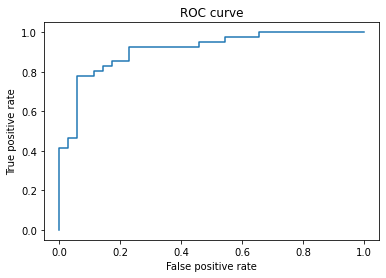

In [26]:
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.savefig('ROC_curve.png')